In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder as le                    
from sklearn.model_selection import train_test_split                     
from sklearn.preprocessing import RobustScaler as rbScaler             
from sklearn.ensemble import VotingClassifier as voClassifier           
from sklearn.tree  import DecisionTreeClassifier as dtClassifier        
from sklearn.ensemble import RandomForestClassifier as rfClassifier     
from sklearn.linear_model import LogisticRegression as lgrClassifier    

# Problem Statement:

To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

In [259]:
credit_df = pd.read_csv('/Users/Ramv/Downloads/CreditScore.csv',encoding = "utf-8" , sep = ",", low_memory=False)

In [260]:
credit_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


Column details:

ID: Represents a unique identification of an entry
Customer_ID: Represents a unique identification of a person
Month: Represents the month of the year
Name: Represents the name of a person
Age: Represents the age of the person
SSN: Represents the social security number of a person
Occupation: Represents the occupation of the person
Annual_Income: Represents the annual income of the person
Monthly_Inhand_Salary: Represents the monthly base salary of a person
Num_Bank_Accounts: Represents the number of bank accounts a person holds
Num_Credit_Card: Represents the number of other credit cards held by a person
Interest_Rate: Represents the interest rate on credit card
Num_of_Loan: Represents the number of loans taken from the bank
Type_of_Loan: Represents the types of loan taken by a person
Delay_from_due_date: Represents the average number of days delayed from the payment date
Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
Changed_Credit_Limit: Represents the percentage change in credit card limit
Num_Credit_Inquiries: Represents the number of credit card inquiries
Credit_Mix: Represents the classification of the mix of credits
Outstanding_Debt: Represents the remaining debt to be paid (in USD)
Credit_Utilization_Ratio: Represents the utilization ratio of credit card
Credit_History_Age: Represents the age of credit history of the person
Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
Total_EMI_per_month: Represents the monthly EMI payments (in USD)
Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
Payment_Behaviour: Represents the payment behavior of the customer (in USD)
Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

In [261]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [262]:
credit_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [263]:
credit_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Observation: The dataset consists of plenty of null values and that needs to be either removed or filled with appropriate values using statistical methods.

<Axes: >

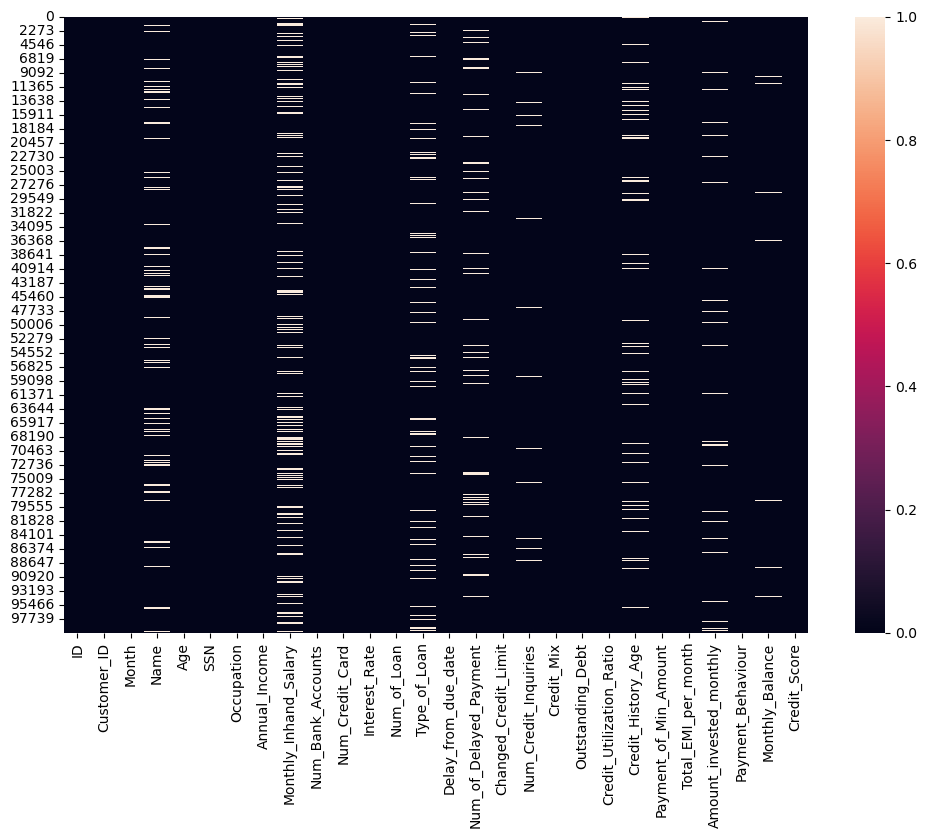

In [264]:
plt.figure(figsize=(12,8))
sns.heatmap(credit_df.isnull())

Using heatmap we can see the spread of null values for each coloumn.

In [265]:
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio']

<Figure size 1800x600 with 0 Axes>

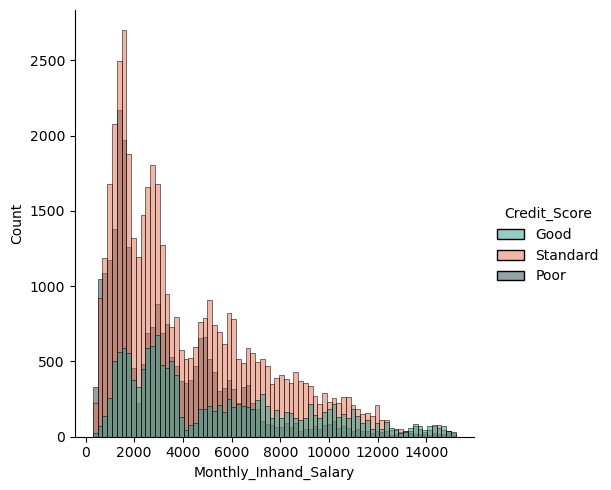

<Figure size 1800x600 with 0 Axes>

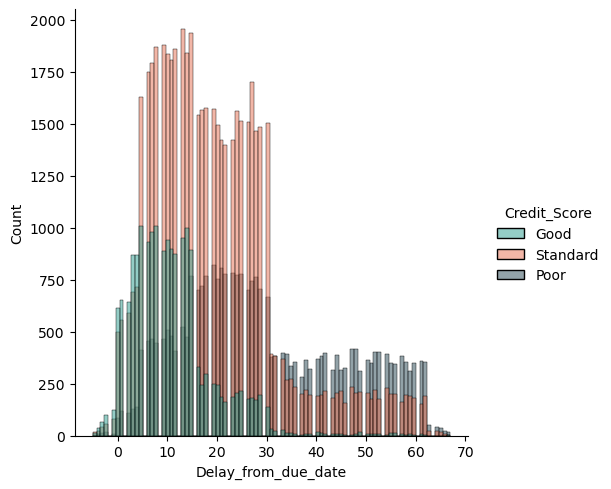

<Figure size 1800x600 with 0 Axes>

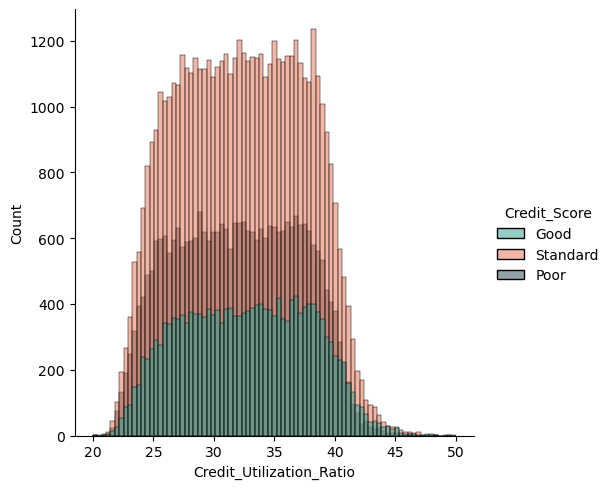

In [266]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=credit_df, hue='Credit_Score', palette = ["#2a9d8f", "#e76f51", "#264653"])
    plt.show()

Observation:Here we can clearly see the distribution of each of the 'numCols', split by Credit_Score. The distribution plot helps to visualize how the values in each feature differ based on the credit score of the customers.

In [267]:
objCols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

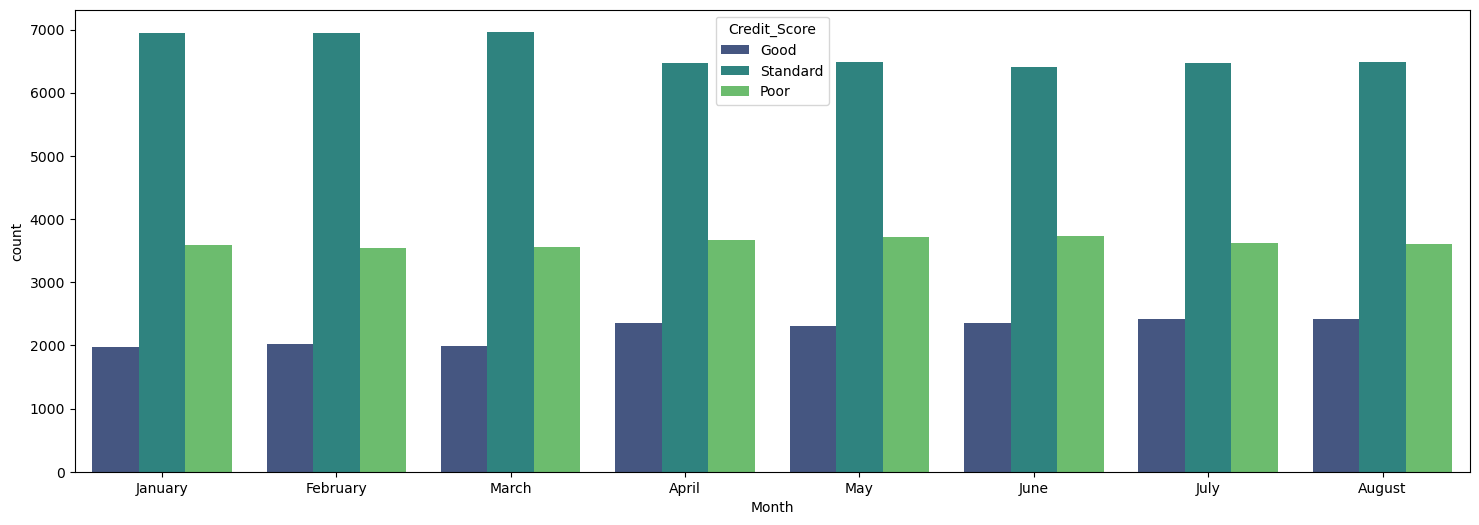

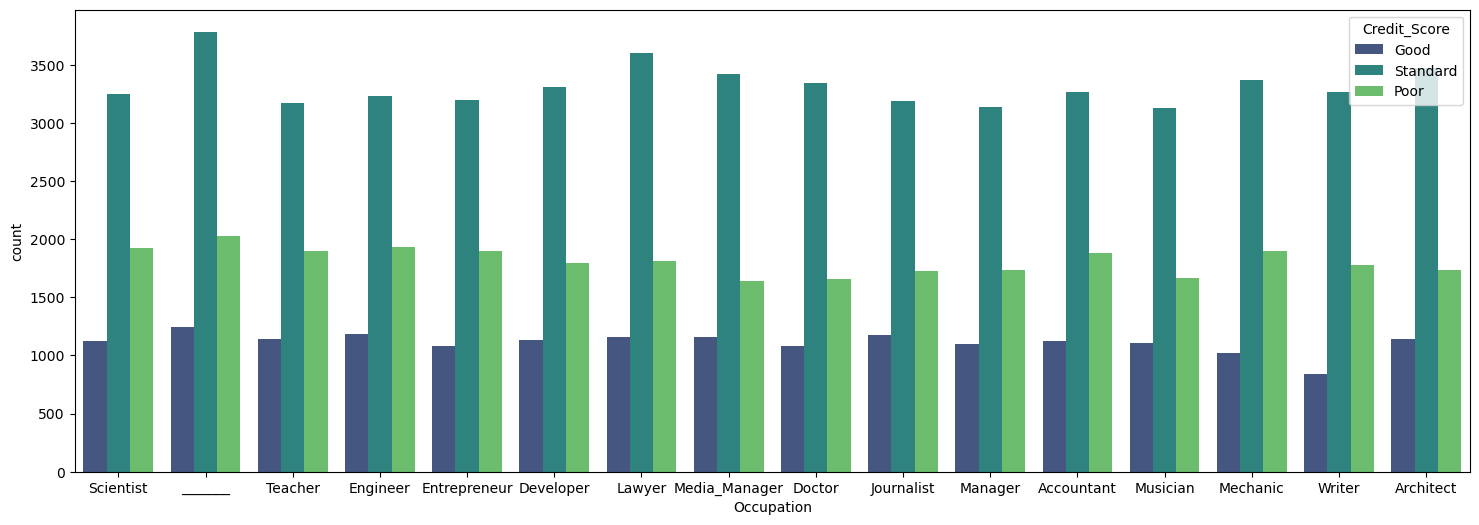

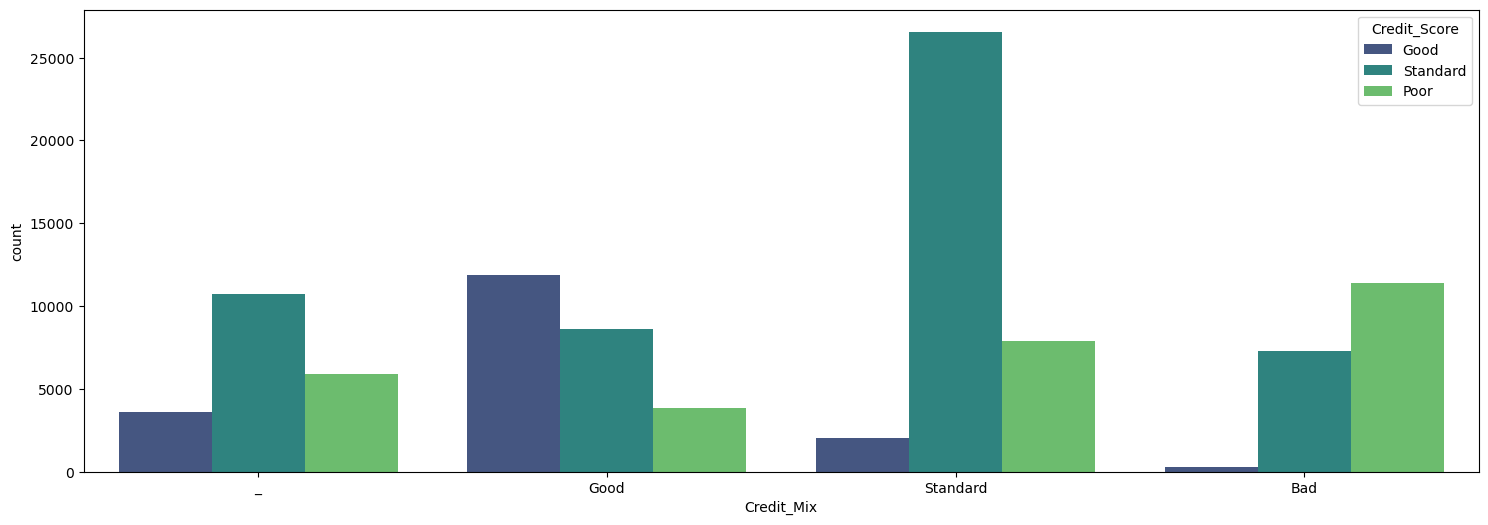

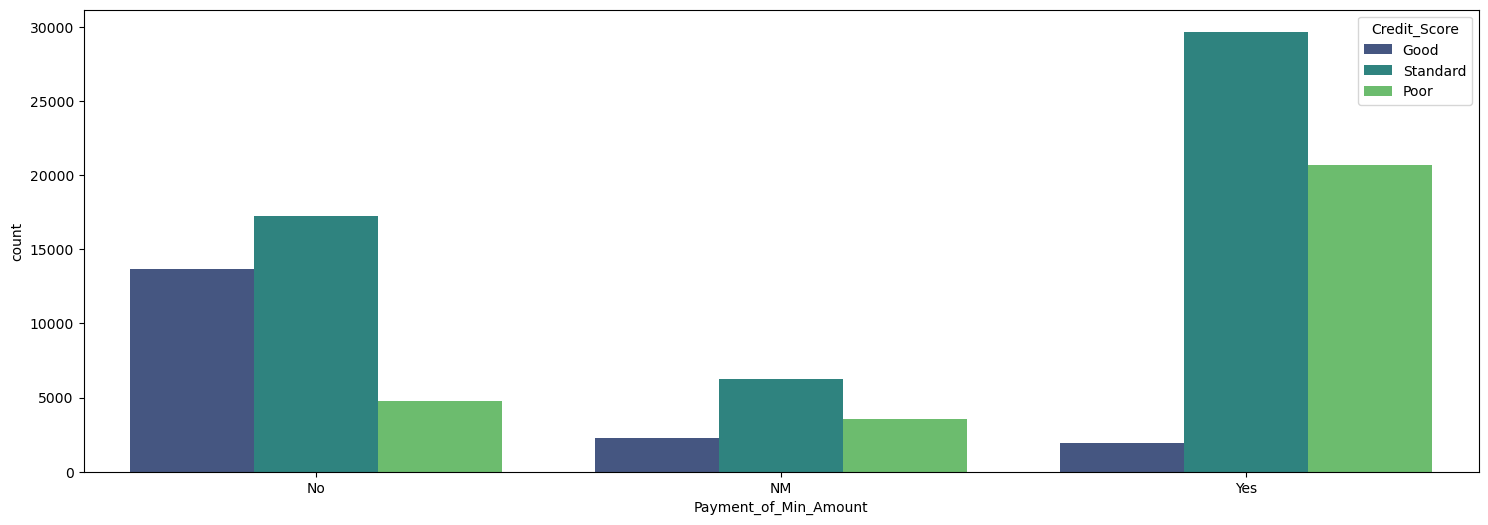

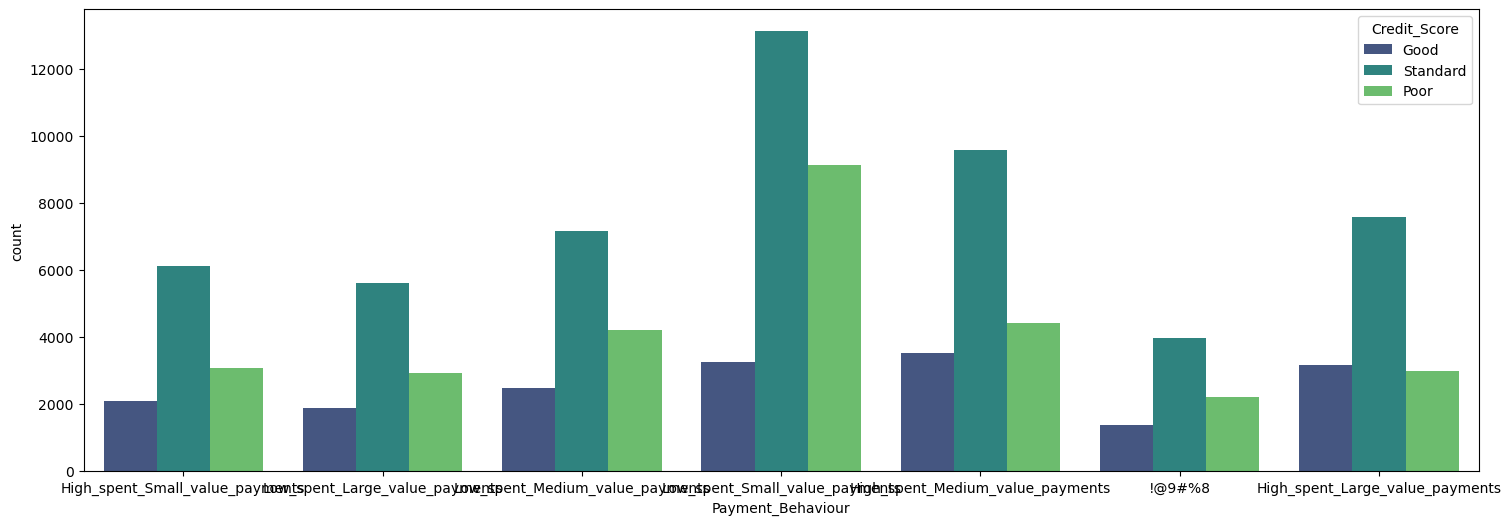

In [268]:
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=credit_df, palette = "viridis", hue="Credit_Score")
    plt.show()

These plots show the distribution of each category within the column and how that distribution varies based on the Credit_Score.

Data-cleaning steps:

Removing any underscores (_) from the string values in the specified columns to prepare the data for numeric conversion.

Converting the cleaned string values into numerical data types, handling any invalid entries by replacing them with NaN.


In [269]:
rows = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
pd.set_option('mode.chained_assignment',None)

In [270]:
for row in rows:
    credit_df[row] = credit_df[row].str.replace(r'_+', '')

/var/folders/fx/1km2ndm10xxcmn5xy9fsdksm0000gn/T/ipykernel_87390/577824388.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  credit_df[row] = credit_df[row].str.replace(r'_+', '')


In [271]:
for row in rows:
    credit_df[row] = pd.to_numeric(credit_df[row], errors='coerce')

In [272]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

# Missing Values treatment

In [273]:
credit_df.dropna(thresh=26, inplace=True)

In [274]:
credit_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9153
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13877
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10507
Delay_from_due_date             0
Num_of_Delayed_Payment       6317
Changed_Credit_Limit         1846
Num_Credit_Inquiries         1749
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8227
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3997
Payment_Behaviour               0
Monthly_Balance              1098
Credit_Score                    0
dtype: int64

In [275]:
credit_df = credit_df[['Month', 'Age', 'Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']]

<Axes: >

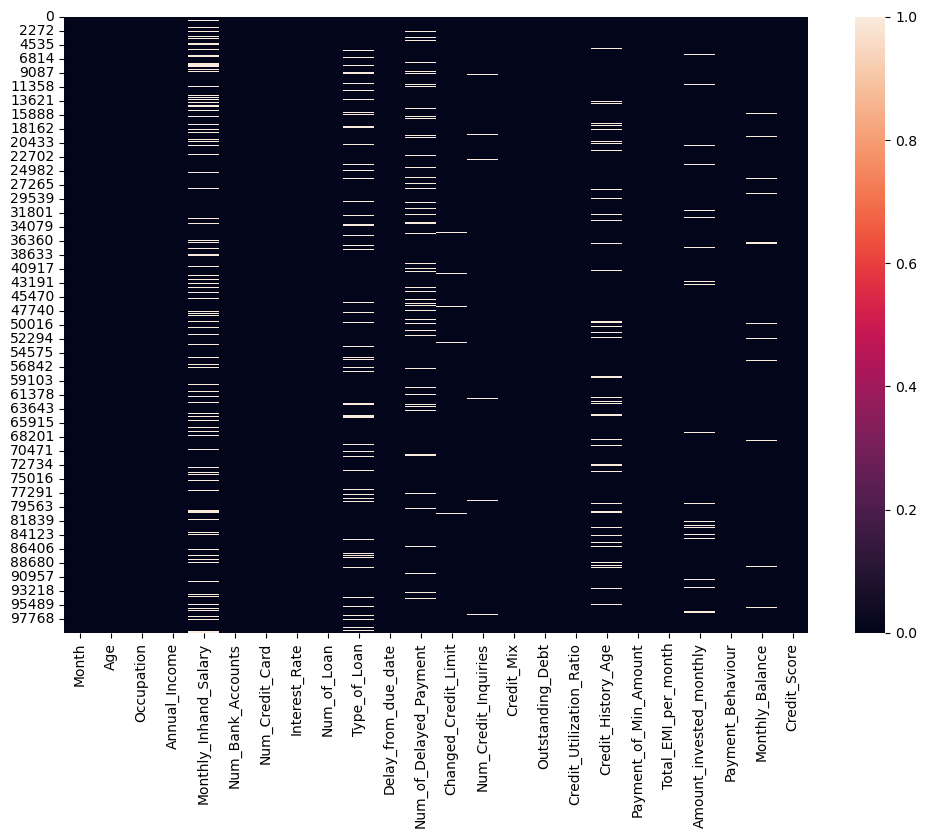

In [276]:
plt.figure(figsize=(12,8))
sns.heatmap(credit_df.isnull())

# Treatment of missing values

Monthly_Inhand_Salary

visualization of the data before treatment

<Figure size 1200x800 with 0 Axes>

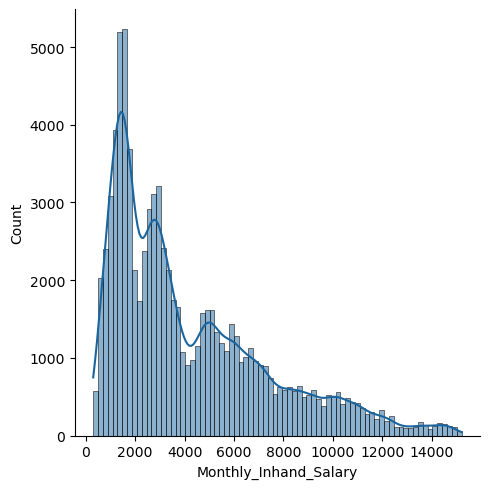

In [277]:
plt.figure(figsize=(12,8))
sns.displot(data=credit_df, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

In [278]:
fill_list = credit_df['Monthly_Inhand_Salary'].dropna().tolist()
credit_df['Monthly_Inhand_Salary'] = credit_df['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

filling in missing data, ensuring that the filled values are realistic and consistent with the original data.

visualization of the data after treatment

<Figure size 1200x800 with 0 Axes>

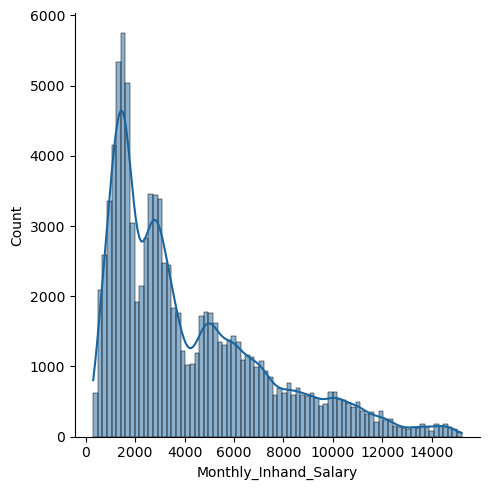

In [279]:
plt.figure(figsize=(12,8))
sns.displot(data=credit_df, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

Same method of filling the missing values is carried out for the other columns.

Type_of_Loan

In [280]:
fill_list = credit_df['Type_of_Loan'].dropna().tolist()
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

Num_of_Delayed_Payment

In [281]:
fill_list = credit_df['Num_of_Delayed_Payment'].dropna().tolist()
credit_df['Num_of_Delayed_Payment'] = credit_df['Num_of_Delayed_Payment'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

Changed_Credit_Limit

In [282]:
fill_list = credit_df['Changed_Credit_Limit'].dropna().tolist()
credit_df['Changed_Credit_Limit'] = credit_df['Changed_Credit_Limit'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

Num_Credit_Inquiries

In [283]:
fill_list = credit_df['Num_Credit_Inquiries'].dropna().tolist()
credit_df['Num_Credit_Inquiries'] = credit_df['Num_Credit_Inquiries'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

Credit_History_Age

In [284]:
fill_list = credit_df['Credit_History_Age'].dropna().tolist()
credit_df['Credit_History_Age'] = credit_df['Credit_History_Age'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

Amount_invested_monthly 

In [285]:
fill_list = credit_df['Amount_invested_monthly'].dropna().tolist()
credit_df['Amount_invested_monthly'] = credit_df['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

Monthly_Balance

In [286]:
fill_list = credit_df['Monthly_Balance'].dropna().tolist()
credit_df['Monthly_Balance'] = credit_df['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list , size = len(credit_df.index))))

<Axes: >

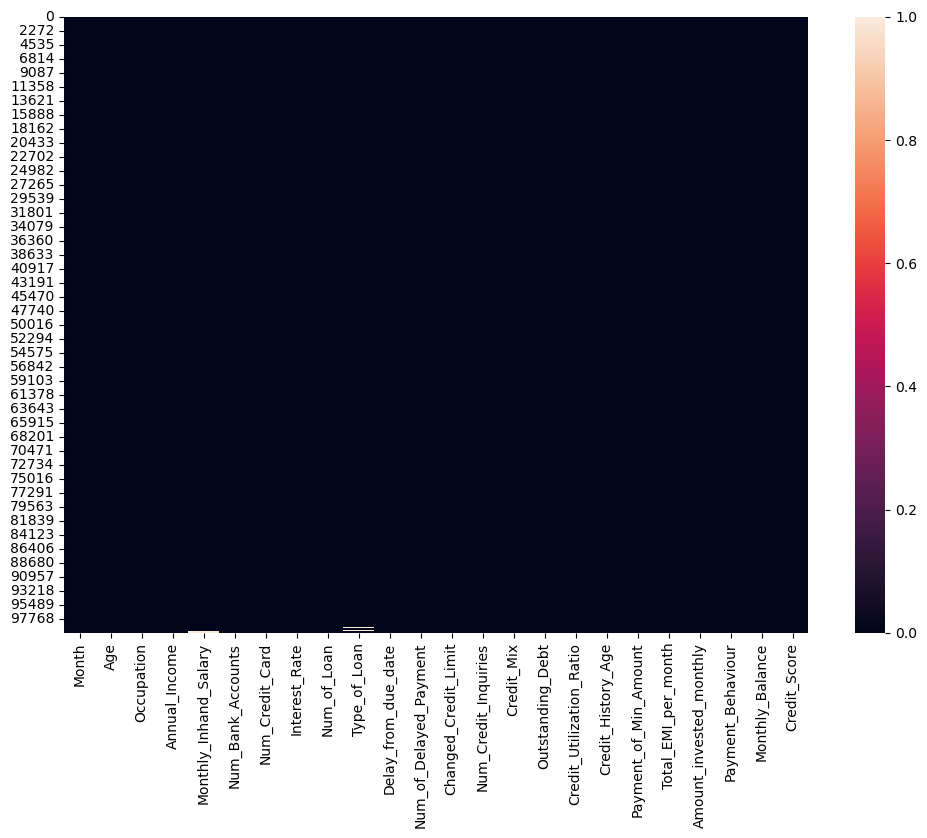

In [287]:
plt.figure(figsize=(12,8))
sns.heatmap(credit_df.isnull())

Observation: the heatmap of the cleaned dataframe clearly depicting that the missing values are filled.

In [288]:
credit_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
2,March,-500,Scientist,19114.12,14584.896667,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,926.284167,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,Scientist,19114.12,3780.880000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [289]:
credit_df.dropna(thresh=24, inplace=True)

In [290]:
credit_df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [291]:
credit_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
2,March,-500,Scientist,19114.12,14584.896667,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,926.284167,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,Scientist,19114.12,3780.880000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor


Observation: 2486 Rows with missing data were removed to handle some outliers.

# Treatment of Ouliers

In [292]:
numCols = credit_df.select_dtypes([np.number]).columns

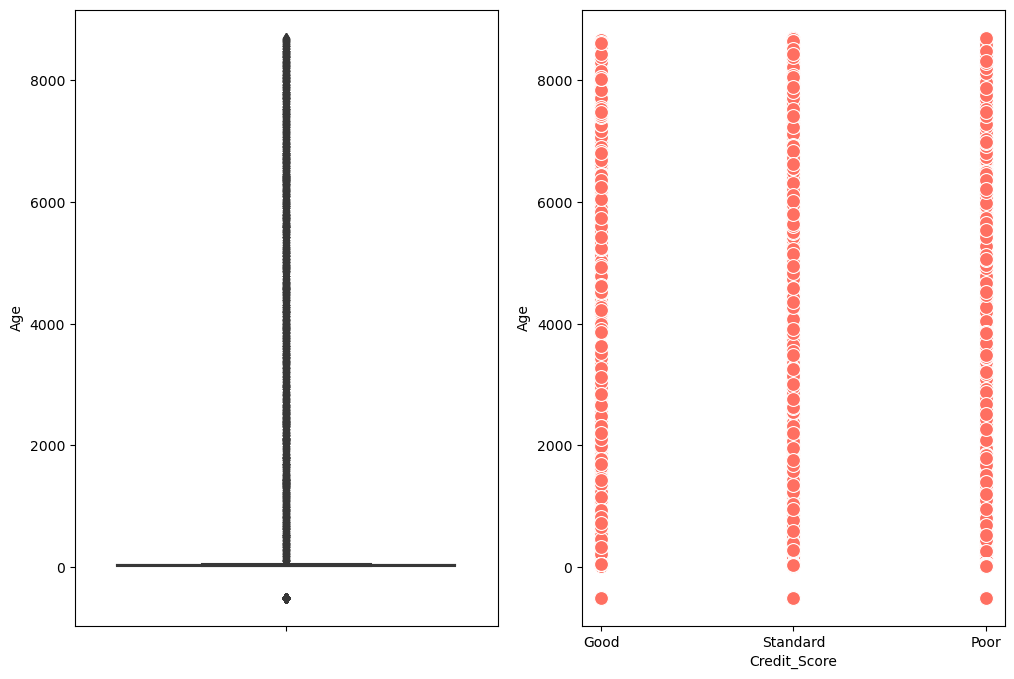

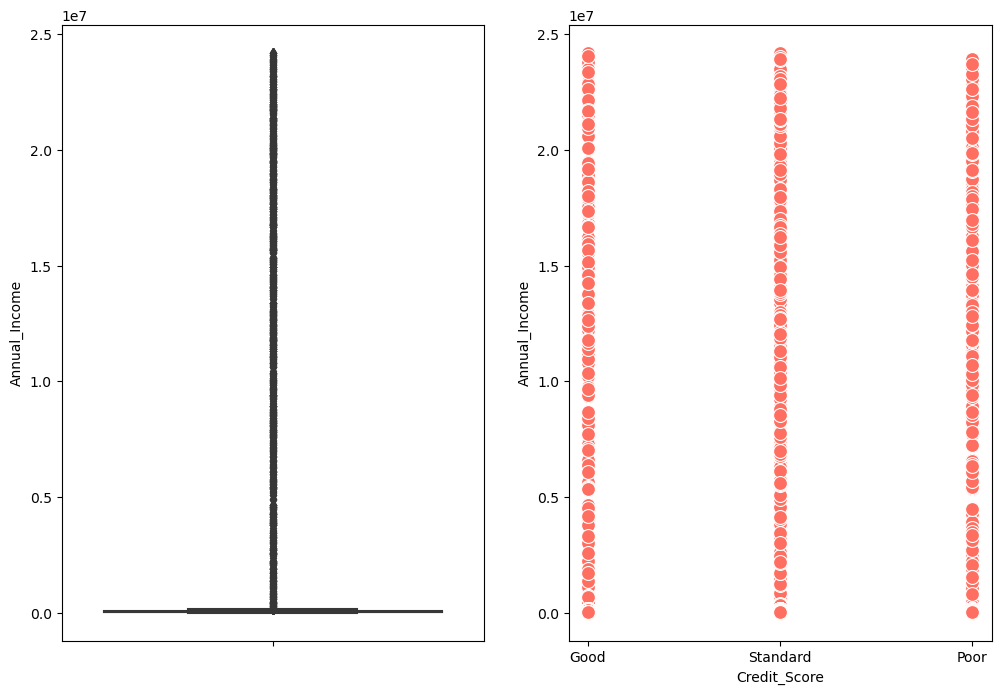

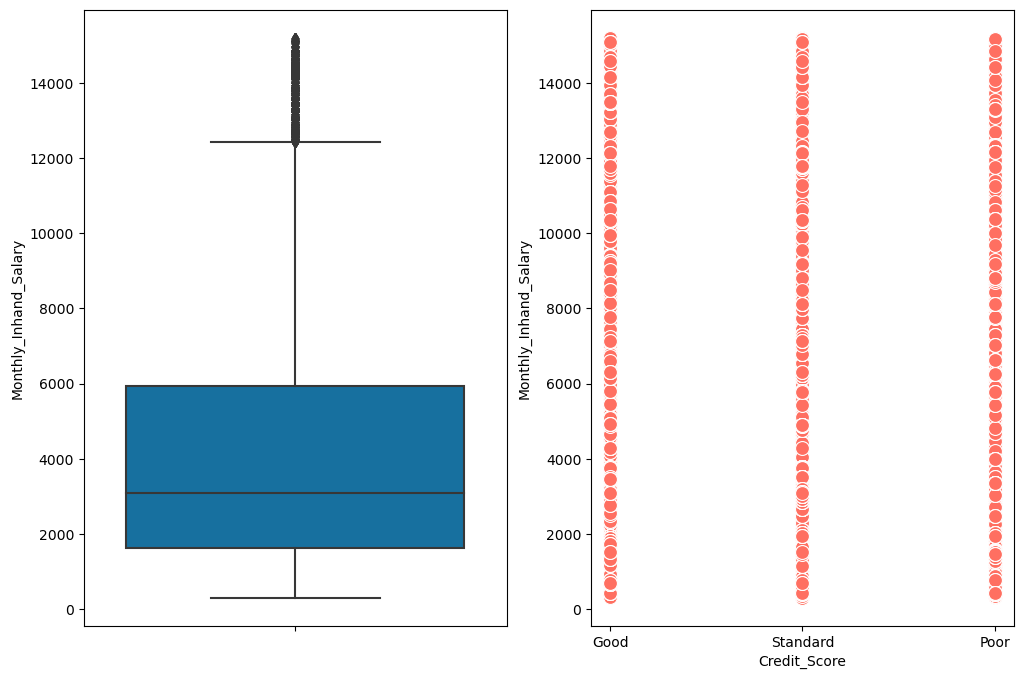

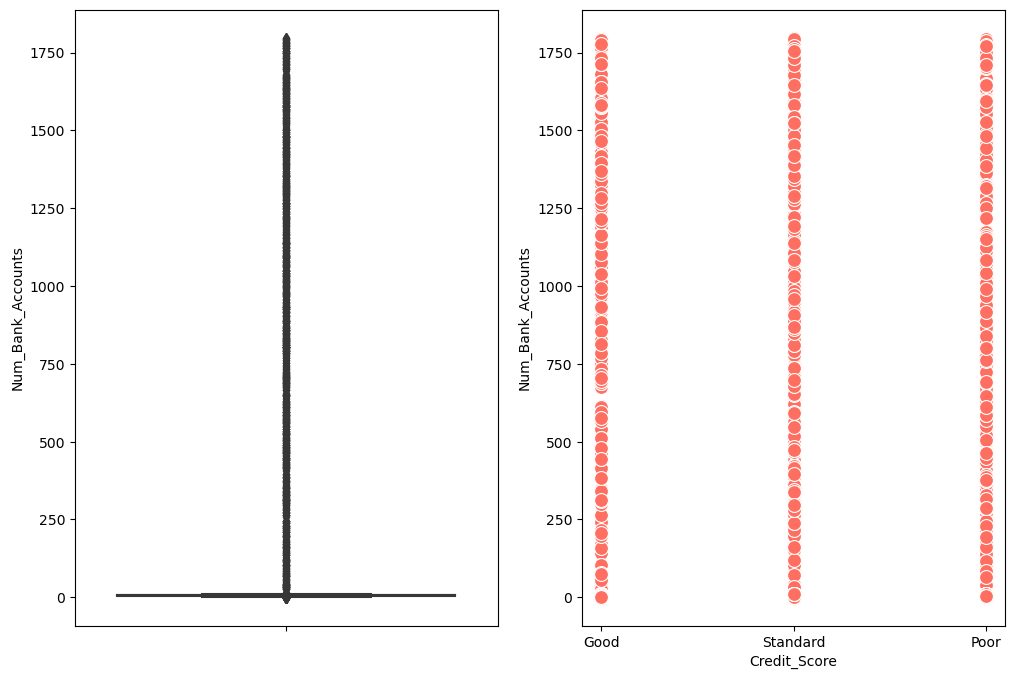

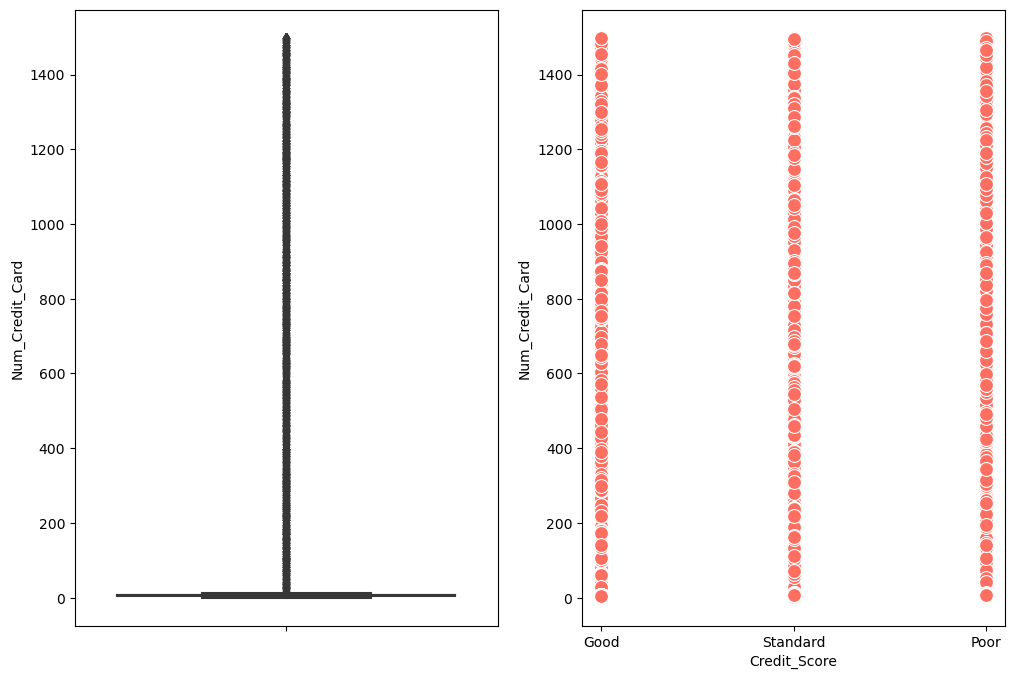

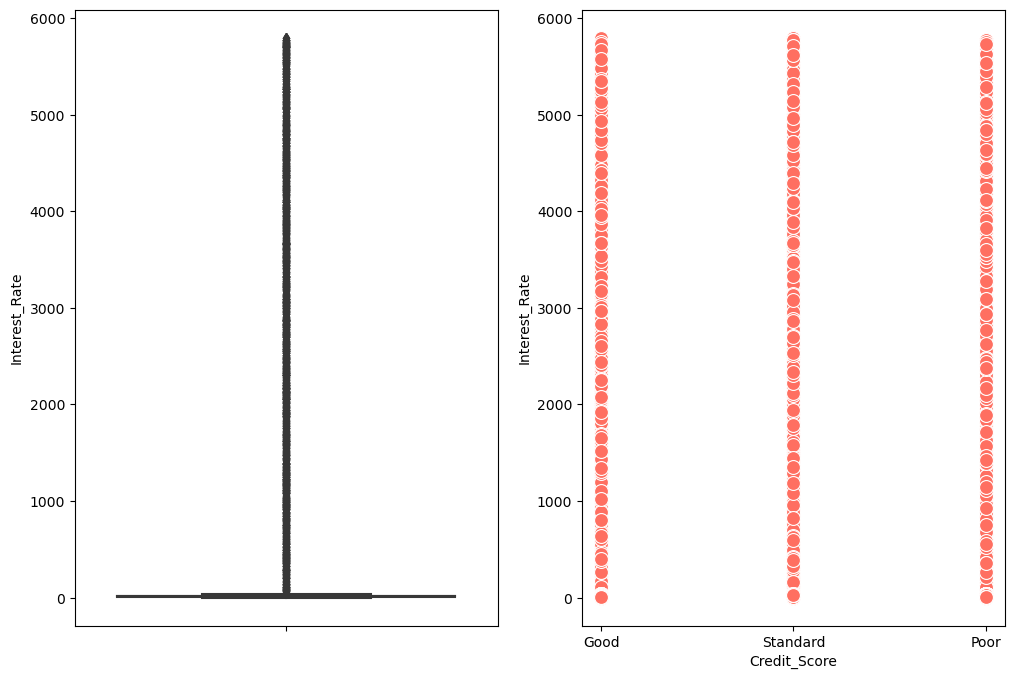

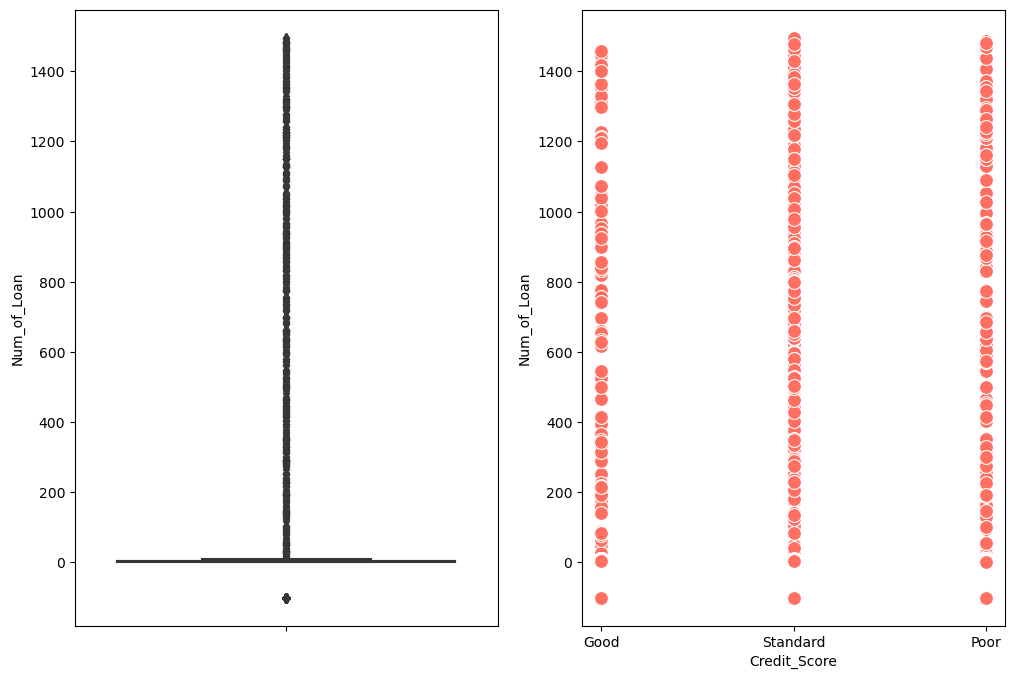

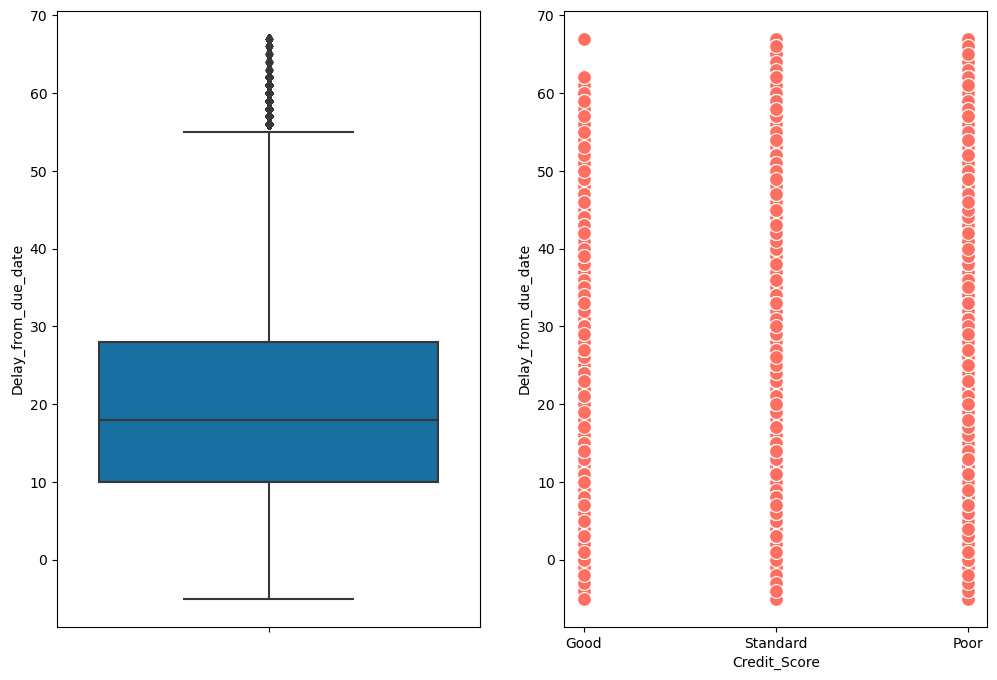

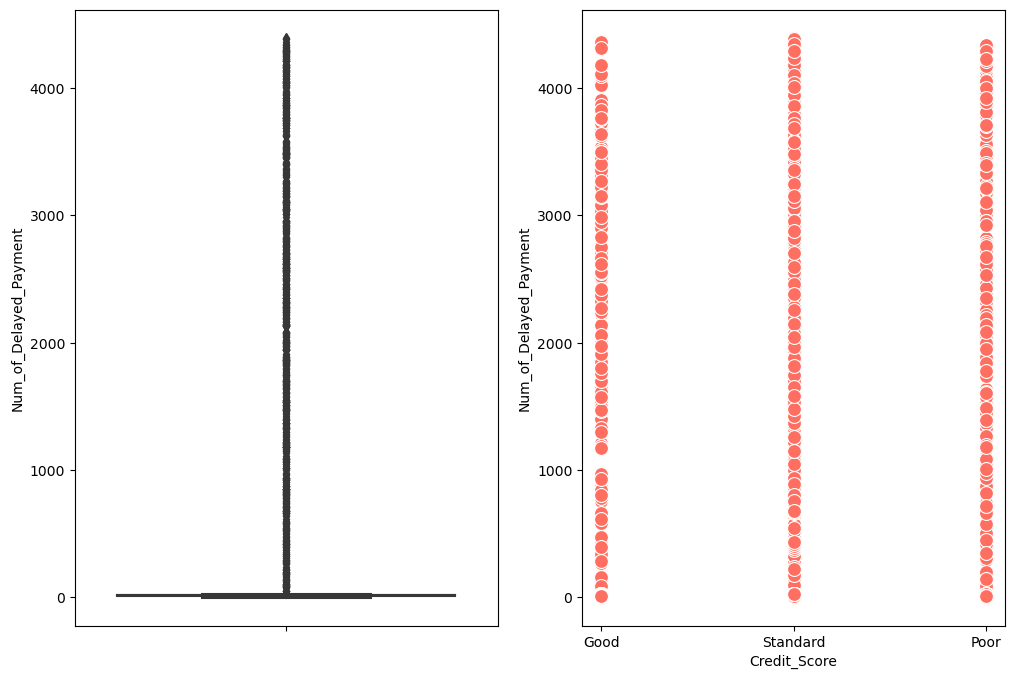

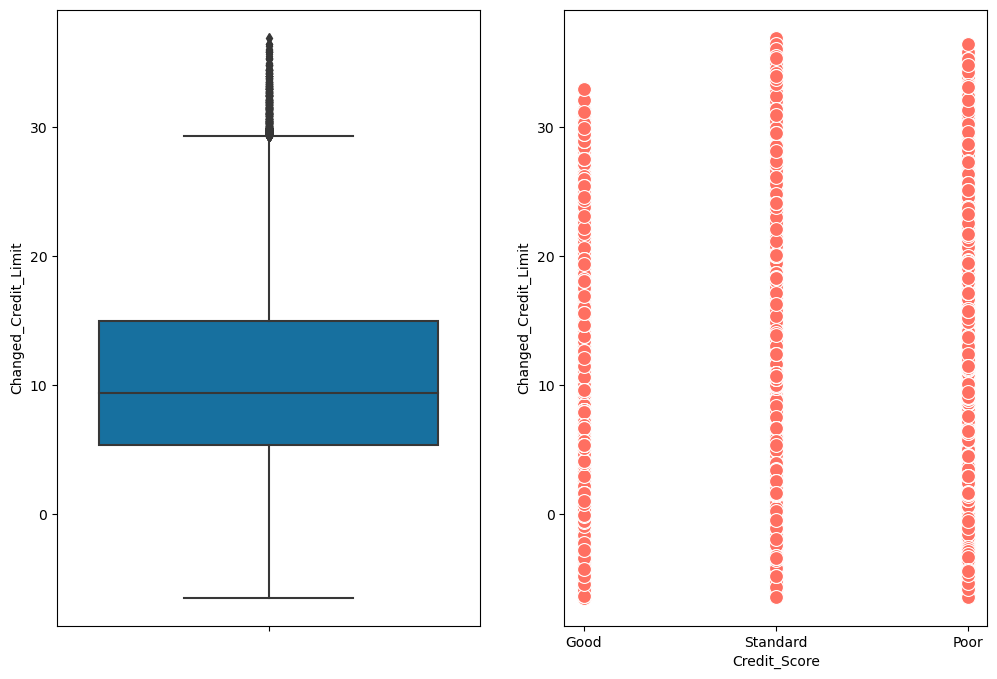

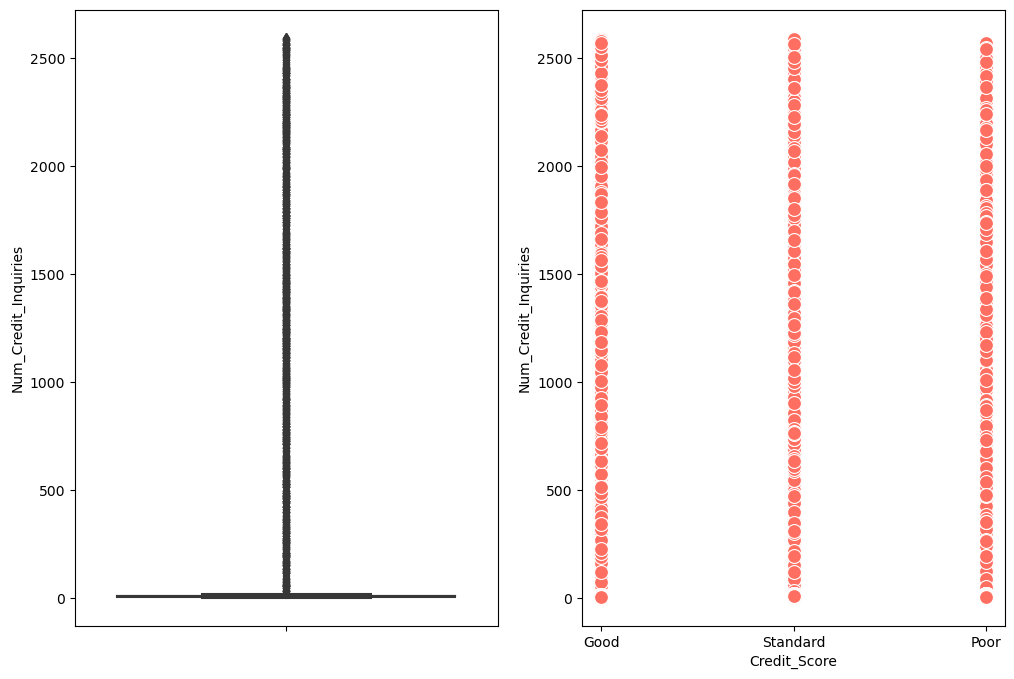

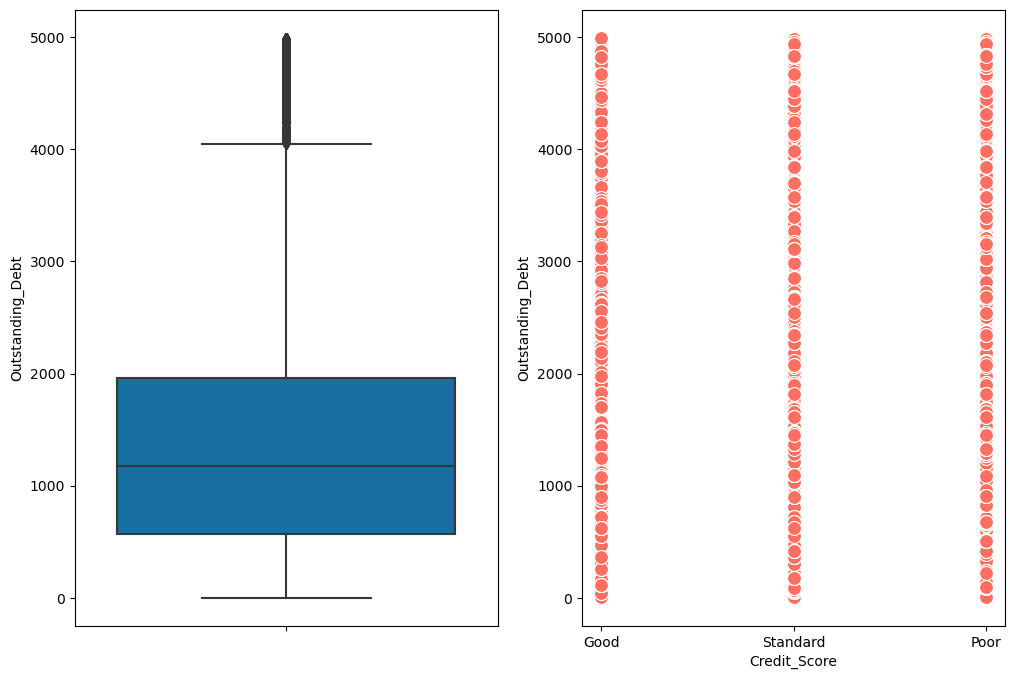

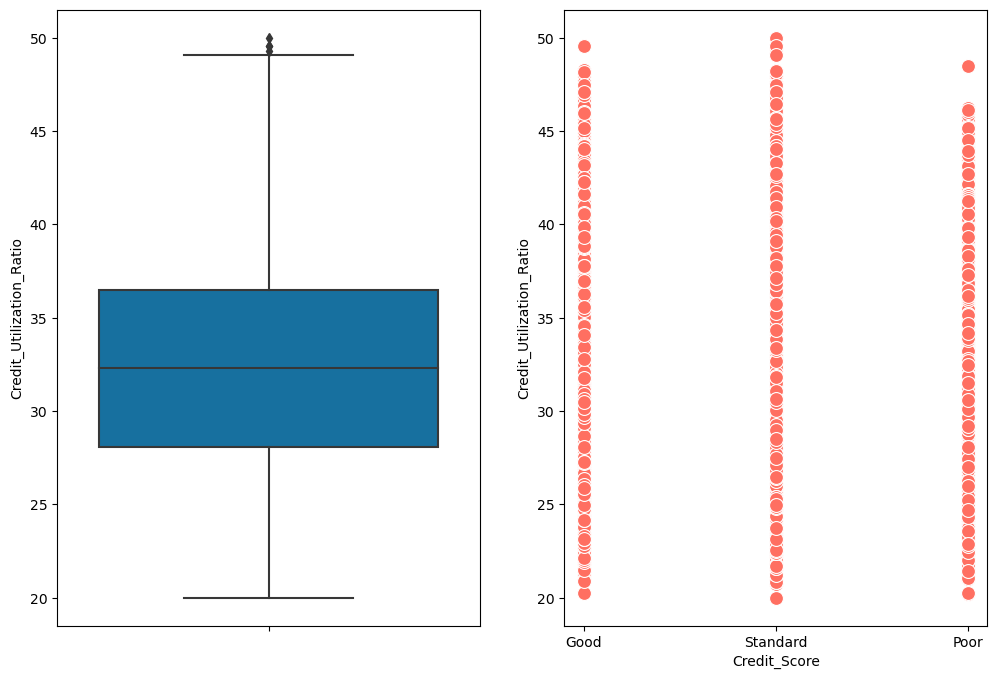

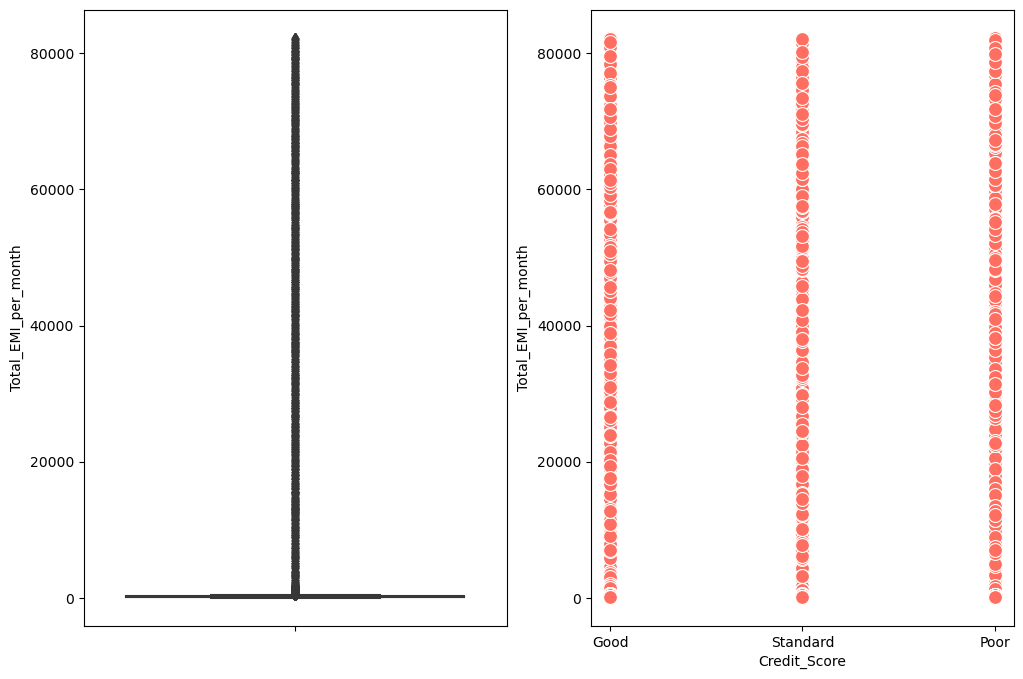

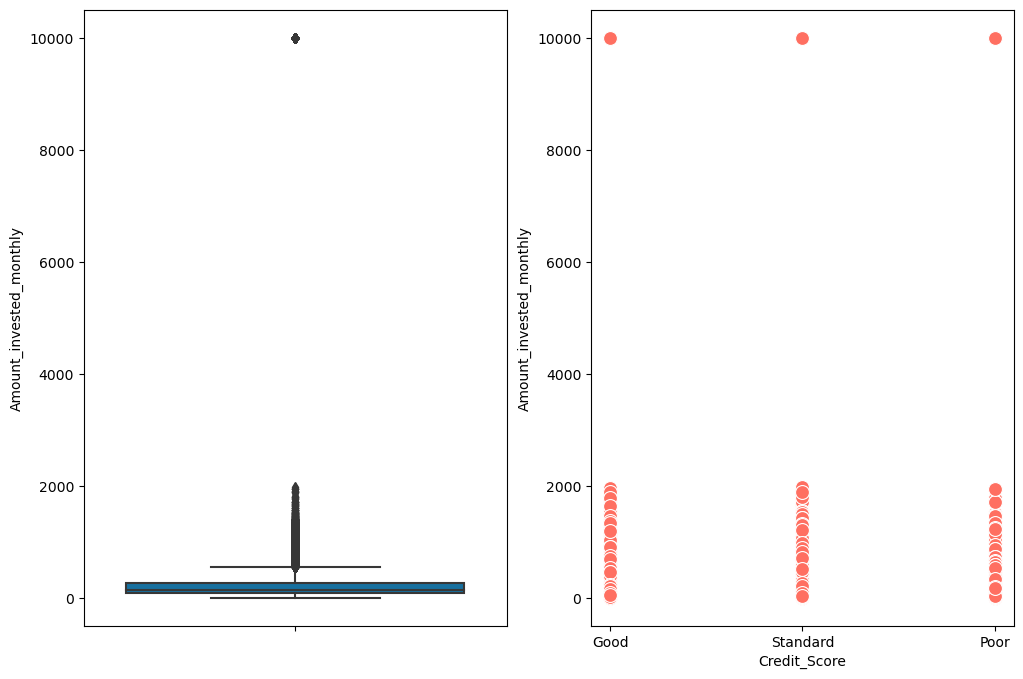

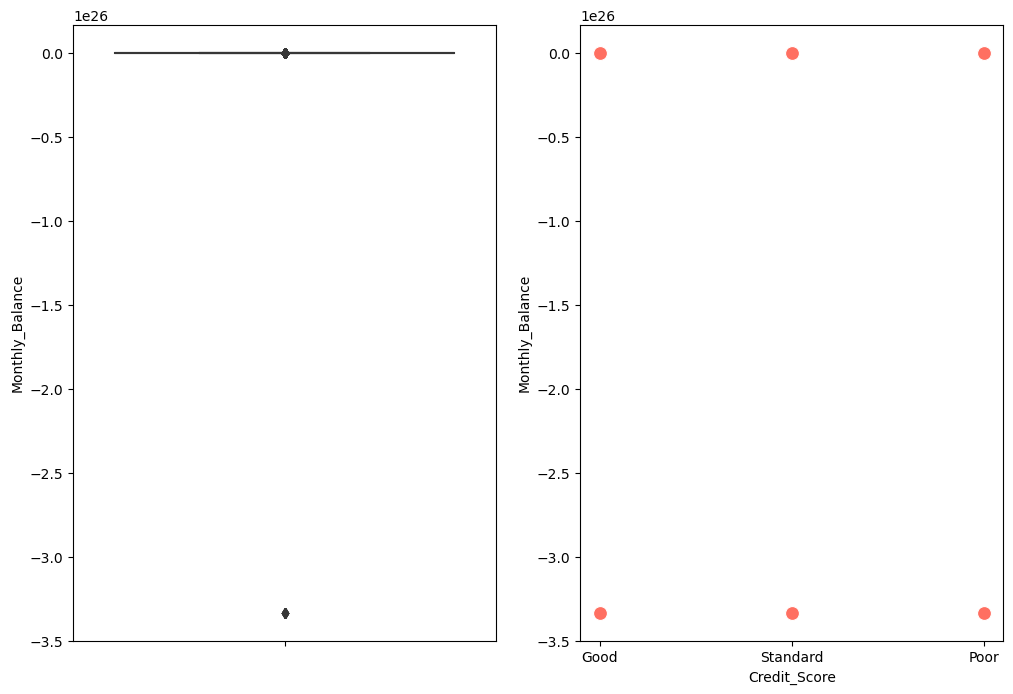

In [293]:
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=credit_df, y=col, ax=ax[0], color="#0077b6")
    sns.scatterplot(data=credit_df,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color = "#ff6f61")
    plt.show()

Data Cleaning: 
    
Ensuring that only valid, realistic values are kept in all of the below columns.
    
Removing outliers or errors where the value is negative or unrealistically high.

Age Outliers Values

In [294]:
((credit_df['Age'] <= 100) & (credit_df['Age'] >= 0)).value_counts()

True     94815
False     2699
Name: Age, dtype: int64

In [295]:
credit_df = credit_df[(credit_df['Age'] <= 100) & (credit_df['Age'] >= 0)]

Annual_Income Outliers Values

In [296]:
(credit_df['Annual_Income'] <= 300000).value_counts()

True     93873
False      942
Name: Annual_Income, dtype: int64

In [297]:
credit_df = credit_df[(credit_df['Annual_Income'] <= 300000)]

Monthly_Inhand_Salary Outliers Values

In [298]:
(credit_df['Monthly_Inhand_Salary'] <= 15000).value_counts()

True     93806
False       67
Name: Monthly_Inhand_Salary, dtype: int64

In [299]:
credit_df = credit_df[(credit_df['Monthly_Inhand_Salary'] <= 15000)]

 Num_Bank_Accounts Outliers Values

In [300]:
(credit_df['Num_Bank_Accounts'] <= 750).value_counts()

True     93082
False      724
Name: Num_Bank_Accounts, dtype: int64

In [301]:
credit_df = credit_df[(credit_df['Num_Bank_Accounts'] <= 750)]

Num_Credit_Card Outliers Values

In [302]:
(credit_df['Num_Credit_Card'] <= 1000).value_counts()

True     92367
False      715
Name: Num_Credit_Card, dtype: int64

In [303]:
credit_df = credit_df[(credit_df['Num_Credit_Card'] <= 1000)]

Interest_Rate Outliers Values

In [304]:
(credit_df['Interest_Rate'] <= 5000).value_counts()

True     92124
False      243
Name: Interest_Rate, dtype: int64

In [305]:
credit_df = credit_df[(credit_df['Interest_Rate'] <= 5000)]

Num_of_Loan Outliers Values

In [306]:
(credit_df['Num_of_Loan'] <= 1100).value_counts()

True     92003
False      121
Name: Num_of_Loan, dtype: int64

In [307]:
credit_df = credit_df[(credit_df['Num_of_Loan'] <= 1100)]

Delay_from_due_date Outliers Values

In [308]:
(credit_df['Delay_from_due_date'] <= 65).value_counts()

True     91952
False       51
Name: Delay_from_due_date, dtype: int64

In [309]:
credit_df = credit_df[(credit_df['Delay_from_due_date'] <= 65)]

Num_of_Delayed_Payment Outliers Values

In [310]:
(credit_df['Num_of_Delayed_Payment'] <= 1000).value_counts()

True     91381
False      571
Name: Num_of_Delayed_Payment, dtype: int64

In [311]:
credit_df = credit_df[(credit_df['Num_of_Delayed_Payment'] <= 1000)]

Changed_Credit_Limit Outliers Values

In [312]:
(credit_df['Changed_Credit_Limit'] <= 30).value_counts()

True     91133
False      248
Name: Changed_Credit_Limit, dtype: int64

In [313]:
credit_df = credit_df[(credit_df['Changed_Credit_Limit'] <= 30)]

Num_Credit_Inquiries Outliers Values

In [314]:
(credit_df['Num_Credit_Inquiries'] <= 2400).value_counts()

True     91032
False      101
Name: Num_Credit_Inquiries, dtype: int64

In [315]:
credit_df = credit_df[(credit_df['Num_Credit_Inquiries'] <= 2400)]

Outstanding_Debt Outliers Values

In [316]:
(credit_df['Outstanding_Debt'] <= 4950).value_counts()

True     90746
False      286
Name: Outstanding_Debt, dtype: int64

In [317]:
credit_df = credit_df[(credit_df['Outstanding_Debt'] <= 4950)]

Credit_Utilization_Ratio Outliers Values

In [318]:
(credit_df['Credit_Utilization_Ratio'] <= 45).value_counts()

True     90613
False      133
Name: Credit_Utilization_Ratio, dtype: int64

In [319]:
credit_df = credit_df[(credit_df['Credit_Utilization_Ratio'] <= 45)]

Total_EMI_per_month Outliers Values

In [320]:
(credit_df['Total_EMI_per_month'] <= 75000).value_counts()

True     90370
False      243
Name: Total_EMI_per_month, dtype: int64

In [321]:
credit_df = credit_df[(credit_df['Total_EMI_per_month'] <= 75000)]

Amount_invested_monthly Outliers Values

In [322]:
(credit_df['Amount_invested_monthly'] <= 9000).value_counts()

True     86306
False     4064
Name: Amount_invested_monthly, dtype: int64

Amount_invested_monthly outliers ignored over 10% of data

Monthly_Balance Outliers Values

In [323]:
(credit_df['Monthly_Balance'] > -1).value_counts()

True     90361
False        9
Name: Monthly_Balance, dtype: int64

In [324]:
credit_df = credit_df[(credit_df['Monthly_Balance'] > -1)]

# Encoding of categorical values

Preprocessing categorical data for machine learning models, as most models require numerical input.

In [325]:
credit_df.select_dtypes(['object']).columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [326]:
Month_le = le()
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

In [327]:
credit_df['Month'] = Month_le.fit_transform(credit_df['Month'])
credit_df['Occupation'] = Occupation_le.fit_transform(credit_df['Occupation'])
credit_df['Type_of_Loan'] = Type_of_Loan_le.fit_transform(credit_df['Type_of_Loan'])
credit_df['Credit_Mix'] = Credit_Mix_le.fit_transform(credit_df['Credit_Mix'])
credit_df['Credit_History_Age'] = Credit_History_Age_le.fit_transform(credit_df['Credit_History_Age'])
credit_df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(credit_df['Payment_of_Min_Amount'])
credit_df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(credit_df['Payment_Behaviour'])
credit_df['Credit_Score'] = Credit_Score_le.fit_transform(credit_df['Credit_Score'])

Checking the Correlation

<Axes: >

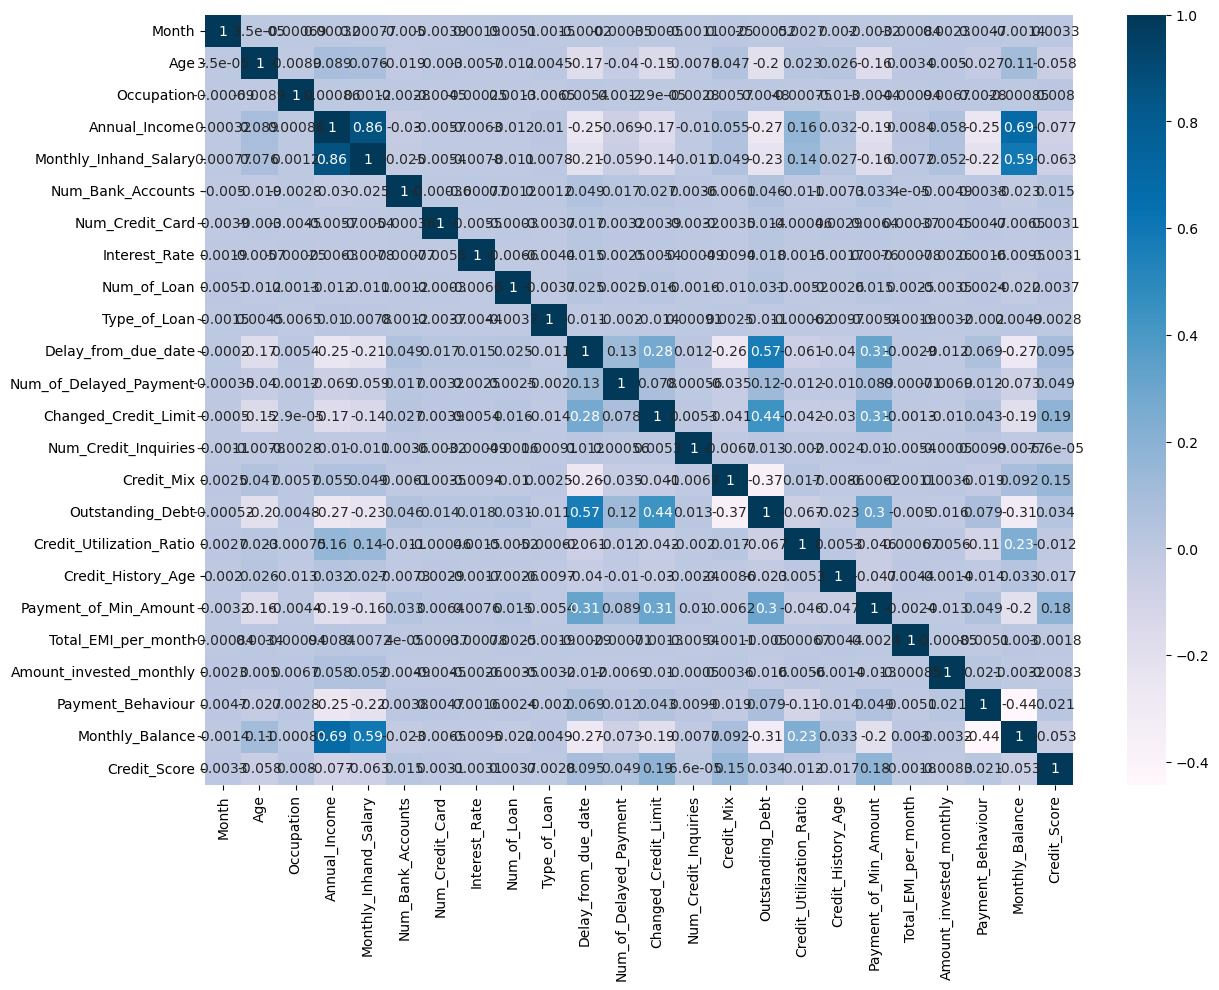

In [328]:
plt.figure(figsize = (14,10))
sns.heatmap(credit_df.corr() , annot = True , cmap = "PuBu")

# Feature Selection

Calculating the correlation between Credit_Score and all other numerical columns in credit_df.

In [329]:
round(abs(credit_df.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Changed_Credit_Limit         18.53
Payment_of_Min_Amount        17.93
Credit_Mix                   14.68
Delay_from_due_date           9.54
Annual_Income                 7.70
Monthly_Inhand_Salary         6.31
Age                           5.77
Monthly_Balance               5.30
Num_of_Delayed_Payment        4.88
Outstanding_Debt              3.37
Payment_Behaviour             2.07
Credit_History_Age            1.70
Num_Bank_Accounts             1.46
Credit_Utilization_Ratio      1.23
Amount_invested_monthly       0.83
Occupation                    0.80
Num_of_Loan                   0.37
Month                         0.33
Interest_Rate                 0.31
Num_Credit_Card               0.31
Type_of_Loan                  0.28
Total_EMI_per_month           0.18
Num_Credit_Inquiries          0.01
Name: Credit_Score, dtype: float64

<Axes: >

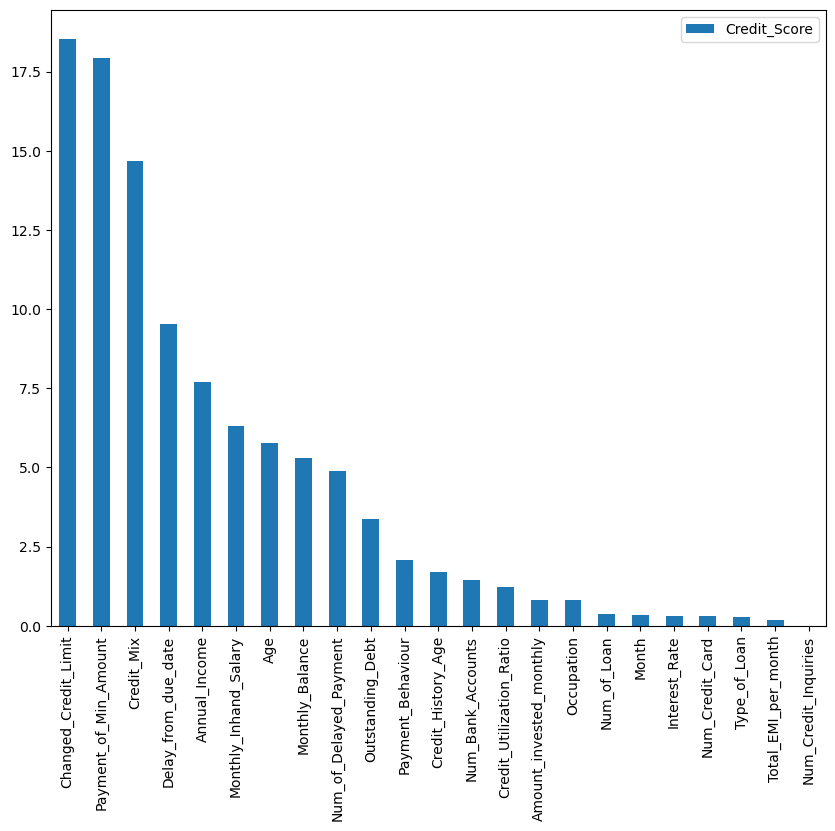

In [330]:
pd.DataFrame(abs(credit_df.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

Creating a dataframe with only the columns that are have high co-relation values with the Credit Score.

In [331]:
new_credit_df = credit_df[['Credit_Score','Changed_Credit_Limit', 'Payment_of_Min_Amount', 'Credit_Mix', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Payment_Behaviour', 'Credit_History_Age', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']]

In [332]:
new_credit_df

,Credit_Score,Changed_Credit_Limit,Payment_of_Min_Amount,Credit_Mix,Delay_from_due_date,Annual_Income,Monthly_Inhand_Salary,Age,Monthly_Balance,Num_of_Delayed_Payment,Outstanding_Debt,Payment_Behaviour,Credit_History_Age,Num_Bank_Accounts,Credit_Utilization_Ratio
0,0,11.27,1,3,3,19114.12,1824.843333,23,312.494089,7.0,809.98,3,180,3,26.822620
3,0,6.27,1,1,5,19114.12,926.284167,23,223.451310,4.0,809.98,6,185,3,31.377862
4,0,11.27,1,1,6,19114.12,1824.843333,23,341.489231,2.0,809.98,2,186,3,24.797347
5,0,9.27,1,1,8,19114.12,3780.880000,23,340.479212,4.0,809.98,0,187,3,27.262259
6,0,11.27,1,1,3,19114.12,1824.843333,23,244.565317,8.0,809.98,6,188,3,22.537593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,2,18.31,2,0,33,20002.88,1929.906667,29,337.362988,25.0,3571.70,1,361,10,37.140784
99994,1,9.50,1,3,20,39628.99,3359.415833,25,410.256158,6.0,502.38,2,306,4,39.323569
99995,1,11.50,1,3,23,39628.99,3359.415833,25,479.866228,7.0,502.38,1,307,4,34.663572
99996,1,11.50,1,3,18,39628.99,3359.415833,25,496.651610,7.0,502.38,2,308,4,40.565631


# Modeling

In [333]:
x = new_credit_df.drop(['Credit_Score'] , axis = 1).values
y = new_credit_df['Credit_Score' ].values

Splitting the data for training and testing

In [334]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
[x_train.shape, y_train.shape]

[(67770, 14), (67770,)]

Data Scaling using Robust Scaler

In [335]:
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.transform(x_test)        
[x_train.shape, x_test.shape]

[(67770, 14), (22591, 14)]

Logistic Regression

In [336]:
credit_lgr = lgrClassifier(C = 100)

In [337]:
credit_lgr.fit(x_train , y_train)

LogisticRegression(C=100)

In [338]:
credit_lgr_score = credit_lgr.score(x_train , y_train)

In [339]:
credit_lgr_score_t = credit_lgr.score(x_test , y_test)

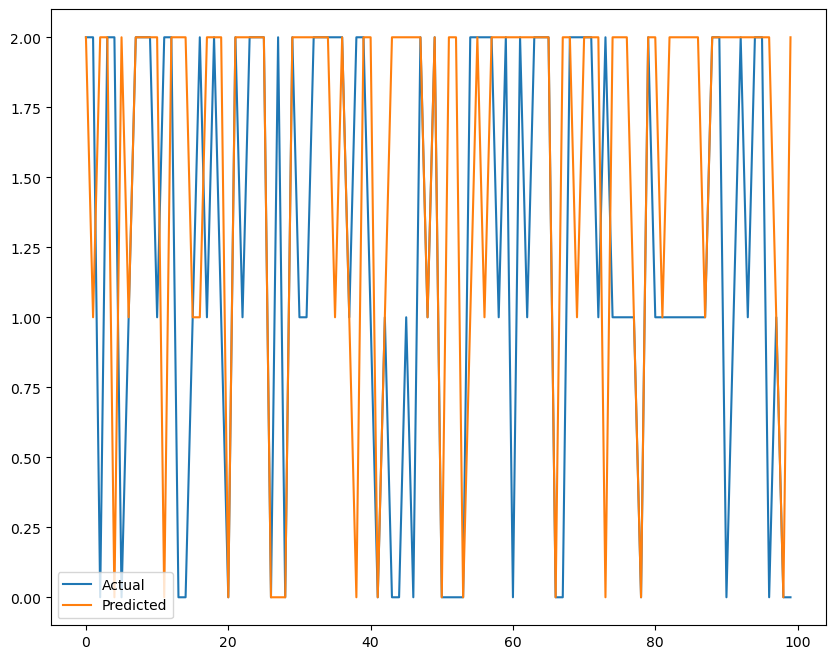

In [340]:
y_pred1 = credit_lgr.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred1": y_pred1})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

Decision Tree Classifier

In [341]:
credit_dt = dtClassifier(max_features=14, max_depth=8)

In [342]:
credit_dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=8, max_features=14)

In [343]:
credit_dt_score = credit_dt.score(x_train , y_train)

In [344]:
credit_dt_score_t = credit_dt.score(x_test , y_test)

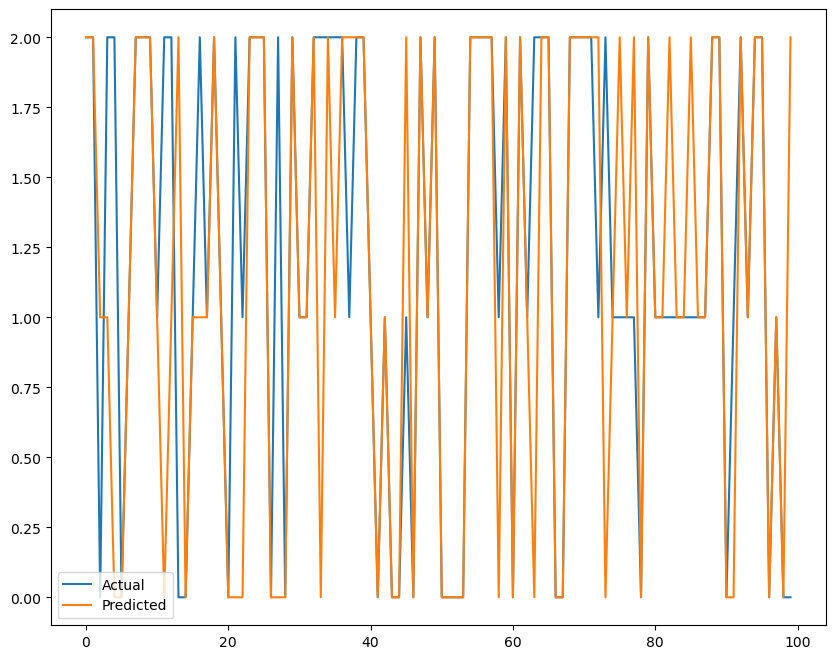

In [345]:
y_pred3 = credit_dt.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred3": y_pred3})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# Summary:

Performance of the two models that is being used and the training and testing scores are being compared.

In [346]:
models = ['Logistic regression', 'Decision tree']
data = [[credit_lgr_score, credit_lgr_score_t],[credit_dt_score, credit_dt_score_t]]
cols = ["Train Score", 'Test Score']
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ['Train Score'])

,Train Score,Test Score
Decision tree,0.700516,0.685937
Logistic regression,0.601800,0.604798


Observation: 

Train Score:
    
Decision Tree: 0.700516 (approximately 70% accuracy on training data)
This indicates that the Decision Tree model correctly classified about 70% of the instances in the training dataset.
A relatively high training score suggests that the model has learned the patterns in the training data well.

Logistic Regression: 0.601800(approximately 60% accuracy on training data)
This indicates that the Logistic Regression model correctly classified about 60% of the instances in the training dataset. 
This score is lower than that of the Decision Tree, suggesting that the Logistic Regression model has not learned the training data as effectively.

Test Score:
    
Decision Tree: 0.685937 (approximately 69% accuracy on testing data)
This means the Decision Tree model correctly classified about 69% of the instances in the testing dataset. 
The test score is slightly lower than the training score (70%), which is common, as models generally perform slightly worse on unseen data due to overfitting.

Logistic Regression: 0.604798 (approximately 61% accuracy on testing data)
This indicates that the Logistic Regression model correctly classified about 61% of the instances in the testing dataset. 
This score is also lower than the training score (60%), but it is relatively close to the training performance.

# Conclusion:

Overall, the results indicate that the Decision Tree is the more effective model for this dataset, but both models require plenty of room for improvement. 
Further steps could include hyperparameter tuning, feature engineering, or trying more complex models to improve performance.